In [1]:
import ipywidgets as ipyw
import awitree as awit
import typing as t
import logging

def _log():
    return logging.getLogger(__name__)

## Simple Interface to jstree with AnyWidget
`awitree` provides a AnyWidget interface to `jsTree` a jquery plugin, that buids interactive trees in browser.

To create a tree, a python dictionary is provided to the constructor with the expected format specified for jstree given [here](https://www.jstree.com/docs/json/).
```python
# Expected format of the node (there are no required fields)
{
  id          : "string" # will be autogenerated if omitted
  text        : "string" # node text
  icon        : "string" # string for custom
  state       : {
    opened    : bool  # is the node open
    disabled  : bool  # is the node disabled
    selected  : bool  # is the node selected
  },
  children    : []  # array of strings or objects
  li_attr     : {}  # attributes for the generated LI node
  a_attr      : {}  # attributes for the generated A node
}
```

This python dictionary is passed to the javascript as a JSON object, which is then rendered by jstree.

When the next cell is run, it should render a tree view as below::

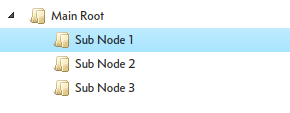


In [2]:
tree_data = {
    "id": "0",
    "text":"Main Root",
    "state": {"open" : True},
    "children" : [
        {"id": "1", "text" : "Sub Node 1", "children":[]},
        {"id": "2", "text" : "Sub Node 2", "children":[]},
        {"id": "3", "text" : "Sub Node 3", "children":[]},
    ]
}

rtree = awit.Tree(data=tree_data)
rtree

Tree(data={'id': '0', 'text': 'Main Root', 'state': {'open': True}, 'children': [{'id': '1', 'text': 'Sub Node…

## Explorer view with `selected_nodes` trait
`awitree.Tree` has a `selected_nodes` trait which keeps track of the selected nodes via the `traitlets` library. Using a dictionary of panels, an explorer-like User Interface can be accomplished as shown in the next cell.

 When the next cell is run, it should appear as below:: 
 
 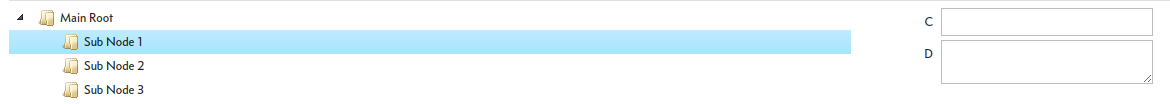

In [3]:
@t.final
class ExplorerTree:
    def __init__(self, data):
        self.panel_dict = {
            "0":  ipyw.VBox([
                ipyw.Text(description="A"),
                ipyw.Textarea(description="B")
            ]),
            "1":  ipyw.VBox([
                ipyw.Text(description="C"),
                ipyw.Textarea(description="D")
            ]),
            "2":  ipyw.VBox([
                ipyw.Text(description="E"),
                ipyw.Textarea(description="F")
            ]),
            "3":  ipyw.VBox([
                ipyw.Text(description="G"),
                ipyw.Textarea(description="H")
            ]),
        }
        self.tree = awit.Tree(data=data)
        self.layout = ipyw.TwoByTwoLayout(top_left=self.tree, bottom_right=None)
        self.tree.observe(self.tree_update, names="selected_nodes")

    def tree_update(self, change: dict[str, t.Any]):
        new_val = change["new"]
        if not len(new_val):
            return
        selected_nodes: list[dict[str, t.Any]] = new_val
        _log().warning(
            "Tree Update selected_nodes : [%s %s]",
            str(change),
            str(selected_nodes)
        )
        selected_id: str = selected_nodes[0]["id"]
        _log().warning(
            "Tree Update ID : [%s]",
            selected_id,
        )
        if selected_id in self.panel_dict:
            side_panel = self.panel_dict[selected_id]
            self.layout.bottom_right = side_panel

#
extree = ExplorerTree(tree_data)
extree.layout

TwoByTwoLayout(children=(Tree(data={'id': '0', 'text': 'Main Root', 'state': {'open': True}, 'children': [{'id…